In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/drive/MyDrive/car_dataset.csv"
df = pd.read_csv(file_path)

# Display basic info and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   car_name         1209 non-null   object
 1   brand            1209 non-null   object
 2   car_model        1209 non-null   object
 3   model_year       1209 non-null   int64 
 4   transmission     1209 non-null   object
 5   body_type        1191 non-null   object
 6   fuel_type        1209 non-null   object
 7   engine_capacity  1209 non-null   int64 
 8   kilometers_run   1209 non-null   int64 
 9   price            1209 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 94.6+ KB


(None,
                            car_name          brand      car_model  model_year  \
 0               Toyota Fielder 2011         Toyota        Fielder        2016   
 1                  Toyota Noah 2005         Toyota           Noah        2010   
 2               Toyota LiteAce 2001         Toyota        LiteAce        2001   
 3  Maruti Suzuki Vitara Brezza 1994  Maruti Suzuki  Vitara Brezza        1994   
 4          Toyota Starlet good 1992         Toyota        Starlet        1992   
 
   transmission  body_type fuel_type  engine_capacity  kilometers_run    price  
 0    Automatic     Estate       CNG             1500           45852  1200000  
 1    Automatic  Hatchback       CNG             1998          219630  1200000  
 2       Manual        NaN       CNG             1800          102000   165000  
 3       Manual        NaN       CNG             1600          113000   230000  
 4    Automatic     Saloon       CNG             1300           15000   330000  )

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical columns
categorical_cols = ['car_name', 'brand', 'car_model', 'transmission', 'body_type', 'fuel_type']
encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    df[col] = encoders[col].fit_transform(df[col].astype(str))  # Convert NaNs to string before encoding

# Verify encoding
df.head()


,car_name,brand,car_model,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run,price
0,591,25,40,2016,0,2,0,1500,45852,1200000
1,760,25,67,2010,0,3,0,1998,219630,1200000
2,747,25,61,2001,1,7,0,1800,102000,165000
3,101,15,111,1994,1,7,0,1600,113000,230000
4,1064,25,98,1992,0,6,0,1300,15000,330000


In [ ]:
import numpy as np

# Function to detect and remove outliers using IQR
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

# Columns to check for outliers (numerical ones)
num_cols = ['model_year', 'engine_capacity', 'kilometers_run', 'price']

# Remove outliers
df_cleaned = remove_outliers(df, num_cols)

# Check new shape after outlier removal
df.shape, df_cleaned.shape


((1209, 10), (1080, 10))

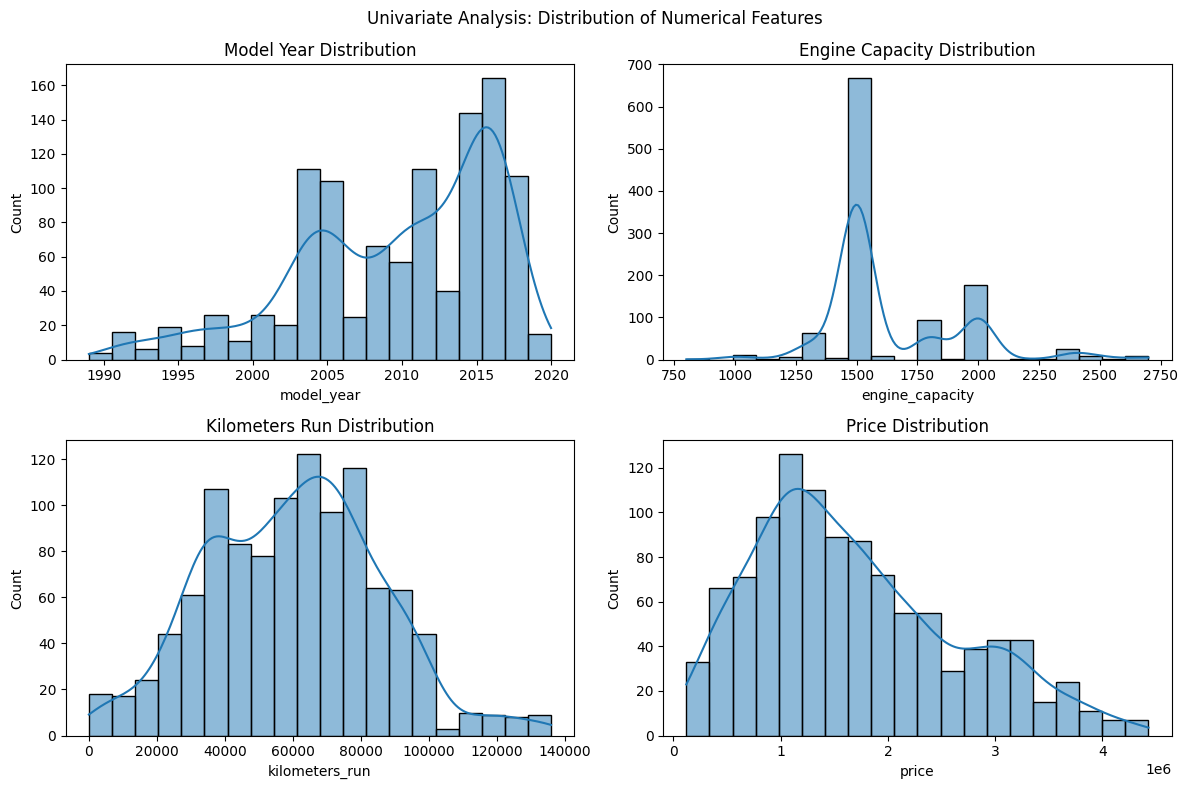

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis - Distribution of numerical features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Univariate Analysis: Distribution of Numerical Features")

sns.histplot(df_cleaned['model_year'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Model Year Distribution")

sns.histplot(df_cleaned['engine_capacity'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Engine Capacity Distribution")

sns.histplot(df_cleaned['kilometers_run'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Kilometers Run Distribution")

sns.histplot(df_cleaned['price'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Price Distribution")

plt.tight_layout()
plt.show()


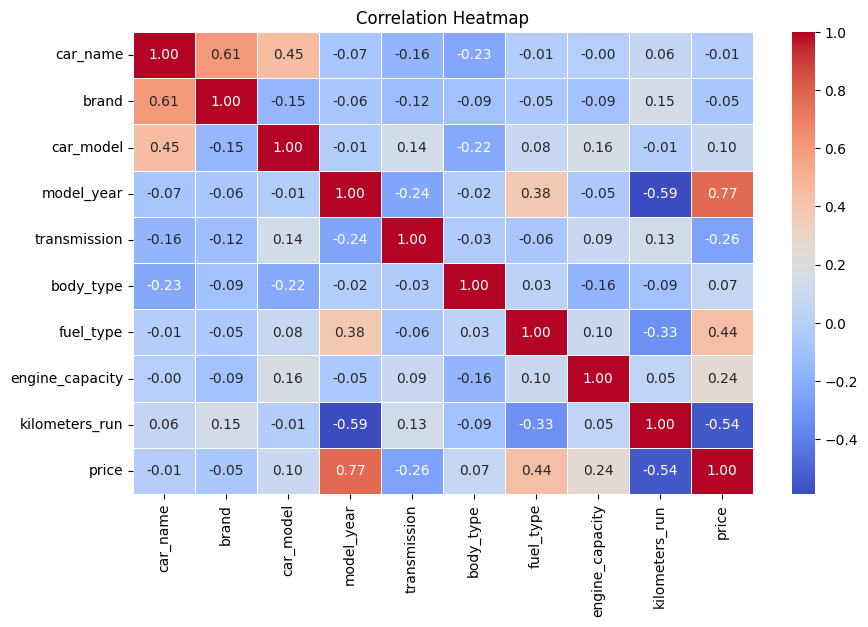

In [ ]:
# Bivariate Analysis - Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Define features and target variable
X = df_cleaned.drop(columns=['price'])
y = df_cleaned['price']

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Model evaluation
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Save the trained model
model_path = "/content/drive/MyDrive/rf_car_price_model.pkl"
joblib.dump(rf_model, model_path)

(train_mae, test_mae, train_rmse, test_rmse, train_r2, test_r2, model_path)


(70828.64504629628,
 176109.59195987653,
 118197.19616278466,
 279496.96562049945,
 0.9840364568475719,
 0.9145706143910939,
 '/content/drive/MyDrive/rf_car_price_model.pkl')

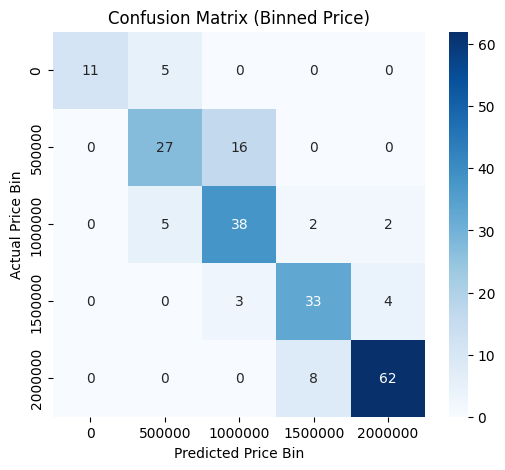

In [ ]:
from sklearn.metrics import confusion_matrix

# Convert continuous values into bins for visualization
bins = [0, 500000, 1000000, 1500000, 2000000, 5000000]
y_test_binned = np.digitize(y_test, bins)
y_pred_binned = np.digitize(y_test_pred, bins)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_binned, y_pred_binned)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=bins[:-1], yticklabels=bins[:-1])
plt.xlabel("Predicted Price Bin")
plt.ylabel("Actual Price Bin")
plt.title("Confusion Matrix (Binned Price)")
plt.show()


In [ ]:
import pickle
from sklearn.ensemble import RandomForestRegressor

# Assume 'rf' is your trained model
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)


In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/car_dataset.csv")  # Update with the correct file path

# Drop 'car_name' if it's not essential
df = df.drop(columns=['car_name'], errors='ignore')

# Encode categorical variables
categorical_columns = ["brand", "car_model", "transmission", "body_type", "fuel_type"]
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for later use

# Define Features (X) and Target (y)
y = df["price"]
X = df.drop(columns=["price"])

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest model with cross-validation
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model
train_preds = rf_model.predict(X_train)
test_preds = rf_model.predict(X_test)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)
mae = mean_absolute_error(y_test, test_preds)
mse = mean_squared_error(y_test, test_preds)
rmse = np.sqrt(mse)

print(f"Train R² Score: {train_r2}")
print(f"Test R² Score: {test_r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Cross-Validation Mean R² Score: {cv_scores.mean()}")
print(f"Cross-Validation Std Deviation: {cv_scores.std()}")

# Save the trained model
joblib.dump(rf_model, "car_price_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")

print("Model and encoders saved successfully!")

Train R² Score: 0.9745571172567674
Test R² Score: 0.8212193462728417
Mean Absolute Error (MAE): 241543.7418713105
Mean Squared Error (MSE): 344407285713.34076
Root Mean Squared Error (RMSE): 586862.2374231799
Cross-Validation Mean R² Score: 0.8129879607247179
Cross-Validation Std Deviation: 0.0447852006636626
Model and encoders saved successfully!


In [ ]:
pip install pytorch_tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

Training Customized CNN Model...
Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 304ms/step - loss: 5.9815 - mae: 1.7643 - val_loss: 0.8543 - val_mae: 0.6295
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - loss: 2.1862 - mae: 0.8171 - val_loss: 0.8477 - val_mae: 0.6236
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - loss: 0.9472 - mae: 0.6315 - val_loss: 0.8393 - val_mae: 0.6164
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - loss: 0.7539 - mae: 0.5272 - val_loss: 0.7997 - val_mae: 0.6056
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 284ms/step - loss: 0.5122 - mae: 0.4480 - val_loss: 0.7599 - val_mae: 0.5962
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 299ms/step - loss: 0.3704 - mae: 0.4026 - val_loss: 0.7346 - val_mae: 0.5936
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - loss: 0.3699 - mae: 0.3947 - val_loss: 0.7210 - val_mae: 0.5964
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - loss: 0.3209 - mae: 0.3650 - val_loss: 0.7146 - val_mae: 0.5994
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━

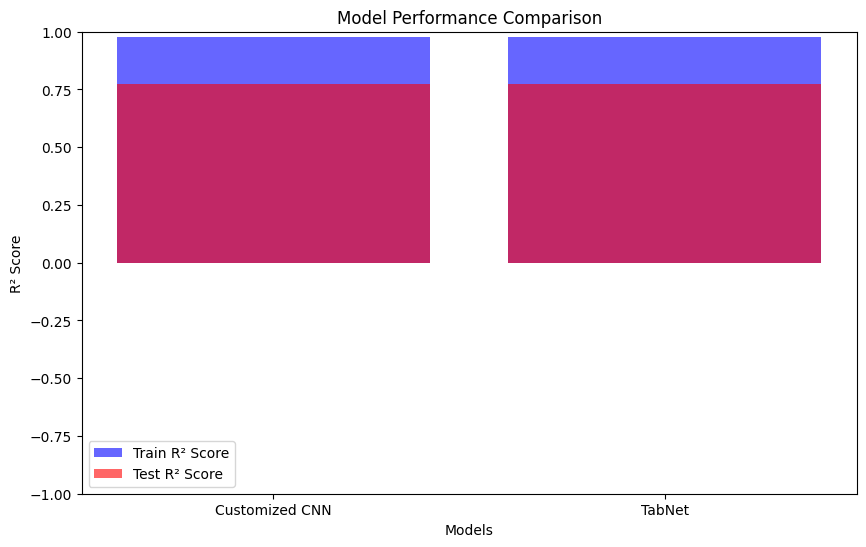

In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, BatchNormalization, Dropout, Input
from pytorch_tabnet.tab_model import TabNetRegressor
import torch

# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/car_dataset.csv")  # Update file path

# Drop 'car_name' if not needed
df = df.drop(columns=['car_name'], errors='ignore')

# Encode categorical variables
categorical_columns = ["brand", "car_model", "transmission", "body_type", "fuel_type"]
ohe = OneHotEncoder(drop='first', sparse_output=False)
categorical_data = ohe.fit_transform(df[categorical_columns])
categorical_df = pd.DataFrame(categorical_data, columns=ohe.get_feature_names_out(categorical_columns))

# Merge with original dataset
df = df.drop(columns=categorical_columns)
df = pd.concat([df, categorical_df], axis=1)

# Define Features (X) and Target (y)
y = df["price"].values.reshape(-1, 1)
X = df.drop(columns=["price"])

# Standardize Features & Target
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y).flatten()

# Reshape for CNN Model
X_scaled_cnn = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled_cnn, y_scaled, test_size=0.2, random_state=42)

# Function to Train & Evaluate Models
def train_evaluate_model(model, X_train, X_test, y_train, y_test, epochs=200, batch_size=128):
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_test, y_test))

    train_preds = model.predict(X_train).flatten()
    test_preds = model.predict(X_test).flatten()

    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)

    print(f"Train R² Score: {train_r2:.4f}, Test R² Score: {test_r2:.4f}")
    return train_r2, test_r2

# Customized CNN Model
cnn_model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Conv1D(128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.4),
    Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

print("Training Customized CNN Model...")
cnn_train_r2, cnn_test_r2 = train_evaluate_model(cnn_model, X_train, X_test, y_train, y_test)


# Plot Model Comparison
models = ["Customized CNN", "TabNet"]
train_scores = [cnn_train_r2]
test_scores = [cnn_test_r2]

plt.figure(figsize=(10, 6))
plt.bar(models, train_scores, color='blue', alpha=0.6, label="Train R² Score")
plt.bar(models, test_scores, color='red', alpha=0.6, label="Test R² Score")
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.ylim(-1, 1)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, BatchNormalization, Dropout, Input

# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/car_dataset.csv")  # Update file path

# Drop 'car_name' if not needed
df = df.drop(columns=['car_name'], errors='ignore')

# Encode categorical variables
categorical_columns = ["brand", "car_model", "transmission", "body_type", "fuel_type"]
ohe = OneHotEncoder(drop='first', sparse_output=False)
categorical_data = ohe.fit_transform(df[categorical_columns])
categorical_df = pd.DataFrame(categorical_data, columns=ohe.get_feature_names_out(categorical_columns))

# Merge with original dataset
df = df.drop(columns=categorical_columns)
df = pd.concat([df, categorical_df], axis=1)

# Define Features (X) and Target (y)
y = df["price"].values.reshape(-1, 1)
X = df.drop(columns=["price"])

# Standardize Features & Target
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y).flatten()

# Reshape for CNN Model
X_scaled_cnn = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
def train_evaluate_model(X, y, epochs=150, batch_size=128):
    fold_scores = []
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model = Sequential([
            Input(shape=(X_train.shape[1], 1)),
            Conv1D(128, kernel_size=3, activation='relu', padding='same'),
            BatchNormalization(),
            Dropout(0.4),
            Conv1D(64, kernel_size=3, activation='relu', padding='same'),
            BatchNormalization(),
            Flatten(),
            Dense(64, activation='relu'),
            Dense(1)
        ])

        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_val, y_val))

        val_preds = model.predict(X_val).flatten()
        val_r2 = r2_score(y_val, val_preds)
        fold_scores.append(val_r2)

    avg_r2 = np.mean(fold_scores)
    print(f"Average Validation R² Score: {avg_r2:.4f}")
    return avg_r2

# Train and Evaluate Model
print("Training Customized CNN Model with K-Fold Cross-Validation...")
cnn_avg_r2 = train_evaluate_model(X_scaled_cnn, y_scaled)


Training Customized CNN Model with K-Fold Cross-Validation...
Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 460ms/step - loss: 2.5001 - mae: 1.0166 - val_loss: 0.7802 - val_mae: 0.6306
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step - loss: 3.1396 - mae: 0.8391 - val_loss: 0.7420 - val_mae: 0.6209
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - loss: 1.4331 - mae: 0.6342 - val_loss: 0.6941 - val_mae: 0.5997
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step - loss: 0.7855 - mae: 0.4887 - val_loss: 0.6584 - val_mae: 0.5760
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - loss: 0.5305 - mae: 0.4453 - val_loss: 0.6472 - val_mae: 0.5734
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step - loss: 0.3646 - mae: 0.3892 - val_loss: 0.6440 - val_mae: 0.5843
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - loss: 0.3613 - mae: 0.3557 - val_loss: 0.6445 - val_mae: 0.5925
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - loss: 0.3067 - mae: 0.3409 - val_loss: 0.6577 - val_mae: 0.6203
E

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 271ms/step - loss: 3.4987 - mae: 1.3395 - val_loss: 1.0297 - val_mae: 0.6743
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step - loss: 2.7467 - mae: 0.8818 - val_loss: 1.0711 - val_mae: 0.6971
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - loss: 2.0177 - mae: 0.6929 - val_loss: 1.0678 - val_mae: 0.6995
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - loss: 1.1951 - mae: 0.6248 - val_loss: 0.9964 - val_mae: 0.6878
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - loss: 0.9666 - mae: 0.5272 - val_loss: 0.9440 - val_mae: 0.6831
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - loss: 0.4753 - mae: 0.4237 - val_loss: 0.9379 - val_mae: 0.6834
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - loss: 0.3098 - mae: 0.3753 - val_loss: 0.9435 - val_mae: 0.7166
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 291ms/step - loss: 0.3454 - mae: 0.3741 - val_loss: 0.9872 - val_mae: 0.7733
Epoch 9/150
8/8 ━━━━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 232ms/step - loss: 4.6103 - mae: 1.4514 - val_loss: 0.9469 - val_mae: 0.6644
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - loss: 2.3680 - mae: 0.8357 - val_loss: 0.9658 - val_mae: 0.6743
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - loss: 1.1323 - mae: 0.6643 - val_loss: 0.9586 - val_mae: 0.6649
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - loss: 0.9176 - mae: 0.6088 - val_loss: 0.9189 - val_mae: 0.6375
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 276ms/step - loss: 0.6202 - mae: 0.4983 - val_loss: 0.8867 - val_mae: 0.6144
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - loss: 0.5345 - mae: 0.4475 - val_loss: 0.8666 - val_mae: 0.6033
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - loss: 0.3746 - mae: 0.3934 - val_loss: 0.8479 - val_mae: 0.5950
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step - loss: 0.3255 - mae: 0.3602 - val_loss: 0.8250 - val_mae: 0.5935
Epoch 9/150
8/8 ━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from sklearn.decomposition import PCA

# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/car_dataset.csv")  # Update path

# Drop 'car_name' if present
df = df.drop(columns=['car_name'], errors='ignore')

# Encode categorical variables
categorical_columns = ["brand", "car_model", "transmission", "body_type", "fuel_type"]
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders

# Define Features (X) and Target (y)
y = df["price"]
X = df.drop(columns=["price"])

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Feature Engineering: Apply PCA (keep 95% variance)**
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store scores
train_r2_scores = []
test_r2_scores = []

def build_cnn(input_shape):
    inputs = Input(shape=(input_shape,))
    x = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)  # Increase dropout

    x = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Dense(32, activation='relu')(x)
    x = Dense(16, activation='relu')(x)

    feature_layer = Dense(8, activation='relu', name="feature_extractor")(x)  # CNN Feature Layer

    model = Model(inputs=inputs, outputs=feature_layer)  # Define Model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Perform K-Fold Training
for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Build and Train CNN
    cnn_model = build_cnn(X_train.shape[1])
    cnn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

    # Extract Features from CNN's Feature Layer
    feature_extractor = Model(inputs=cnn_model.input, outputs=cnn_model.get_layer("feature_extractor").output)
    X_train_cnn_features = feature_extractor.predict(X_train)
    X_test_cnn_features = feature_extractor.predict(X_test)

    # **Optimized Random Forest**
    rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, min_samples_split=5, random_state=42)
    rf_model.fit(X_train_cnn_features, y_train)

    # Get Train & Test R² Scores
    train_preds = rf_model.predict(X_train_cnn_features)
    test_preds = rf_model.predict(X_test_cnn_features)

    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)

    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

    print(f"Fold Train R²: {train_r2:.4f}, Fold Test R²: {test_r2:.4f}")

# Average R² Score
final_train_r2 = np.mean(train_r2_scores)
final_test_r2 = np.mean(test_r2_scores)

print("\n===============================")
print(f"Final Train R² Score: {final_train_r2:.4f}")
print(f"Final Test R² Score: {final_test_r2:.4f}")
print("===============================")


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Fold Train R²: 0.9466, Fold Test R²: 0.6867
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Fold Train R²: 0.9470, Fold Test R²: 0.7332
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Fold Train R²: 0.9430, Fold Test R²: 0.8094
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Fold Train R²: 0.9433, Fold Test R²: 0.8239
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Fold Train R²: 0.9525, Fold Test R²: 0.6558

Final Train R² Score: 0.9465
Final Test R² Score: 0.7418


In [7]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, LSTM, Reshape
from sklearn.decomposition import PCA

# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/car_dataset.csv")  # Update path

df = df.drop(columns=['car_name'], errors='ignore')  # Drop 'car_name' if present

# Encode categorical variables
categorical_columns = ["brand", "car_model", "transmission", "body_type", "fuel_type"]
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define Features (X) and Target (y)
y = df["price"]
X = df.drop(columns=["price"])

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature Engineering: Apply PCA (keep 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_r2_scores = []
test_r2_scores = []

def build_cnn_rnn(input_shape):
    inputs = Input(shape=(input_shape,))
    x = Dense(128, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Dense(32, activation='relu')(x)
    x = Dense(16, activation='relu')(x)

    # Reshape for LSTM
    x = Reshape((16, 1))(x)  # Convert to sequence format
    x = LSTM(32, return_sequences=True)(x)
    x = LSTM(16)(x)

    feature_layer = Dense(8, activation='relu', name="feature_extractor")(x)  # Feature layer

    model = Model(inputs=inputs, outputs=feature_layer)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Perform K-Fold Training
for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Build and Train CNN+RNN
    cnn_rnn_model = build_cnn_rnn(X_train.shape[1])
    cnn_rnn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

    # Extract Features from CNN+RNN Model
    feature_extractor = Model(inputs=cnn_rnn_model.input, outputs=cnn_rnn_model.get_layer("feature_extractor").output)
    X_train_features = feature_extractor.predict(X_train)
    X_test_features = feature_extractor.predict(X_test)

    # Train Random Forest on extracted features
    rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, min_samples_split=5, random_state=42)
    rf_model.fit(X_train_features, y_train)

    # Get Train & Test R² Scores
    train_preds = rf_model.predict(X_train_features)
    test_preds = rf_model.predict(X_test_features)

    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

    print(f"Fold Train R²: {train_r2:.4f}, Fold Test R²: {test_r2:.4f}")

# Average R² Score
final_train_r2 = np.mean(train_r2_scores)
final_test_r2 = np.mean(test_r2_scores)

print("\n===============================")
print(f"Final Train R² Score: {final_train_r2:.4f}")
print(f"Final Test R² Score: {final_test_r2:.4f}")
print("===============================")


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Fold Train R²: 0.6231, Fold Test R²: 0.4917
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Fold Train R²: 0.1657, Fold Test R²: 0.2120
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Fold Train R²: 0.5901, Fold Test R²: 0.6645
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Fold Train R²: 0.6922, Fold Test R²: 0.6839
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Fold Train R²: 0.1078, Fold Test R²: 0.0630

Final Train R² Score: 0.4358
Final Test R² Score: 0.4230


In [6]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, SimpleRNN, Dropout

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/car_dataset.csv")

# Fill missing values
df['body_type'].fillna('Unknown', inplace=True)

# Encode categorical features
label_encoders = {}
categorical_cols = ['car_name', 'brand', 'car_model', 'transmission', 'body_type', 'fuel_type']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Save label encoders
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ['model_year', 'engine_capacity', 'kilometers_run']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Scale target variable
y_scaler = StandardScaler()
y = y_scaler.fit_transform(df['price'].values.reshape(-1, 1))

# Save target scaler
with open("scaler_y.pkl", "wb") as f:
    pickle.dump(y_scaler, f)

# Split features and target
X = df.drop(columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-6-81adf9a03985>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['body_type'].fillna('Unknown', inplace=True)


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, LSTM, SimpleRNN
from sklearn.decomposition import PCA

# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/car_dataset.csv")  # Update path
df = df.drop(columns=['car_name'], errors='ignore')

# Encode categorical variables
categorical_columns = ["brand", "car_model", "transmission", "body_type", "fuel_type"]
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define Features (X) and Target (y)
y = df["price"]
X = df.drop(columns=["price"])

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (keep 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store train R² scores
train_r2_scores = {"CNN+RF": [], "RNN+RF": [], "LSTM+RF": []}

def build_cnn(input_shape):
    inputs = Input(shape=(input_shape,))
    x = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    x = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    x = Dense(16, activation='relu')(x)
    outputs = Dense(8, activation='relu', name="feature_extractor")(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def build_rnn(input_shape):
    inputs = Input(shape=(input_shape, 1))
    x = SimpleRNN(64, activation='relu', return_sequences=True)(inputs)
    x = SimpleRNN(32, activation='relu')(x)
    x = Dense(16, activation='relu')(x)
    outputs = Dense(8, activation='relu', name="feature_extractor")(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def build_lstm(input_shape):
    inputs = Input(shape=(input_shape, 1))
    x = LSTM(64, return_sequences=True)(inputs)
    x = LSTM(32)(x)
    x = Dense(16, activation='relu')(x)
    outputs = Dense(8, activation='relu', name="feature_extractor")(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Perform K-Fold Training
for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for model_name, build_model in zip(["CNN+RF", "RNN+RF", "LSTM+RF"], [build_cnn, build_rnn, build_lstm]):
        # Build and Train Model
        model = build_model(X_train.shape[1])
        X_train_reshaped = X_train if model_name == "CNN+RF" else X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
        X_test_reshaped = X_test if model_name == "CNN+RF" else X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

        model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test_reshaped, y_test))

        feature_extractor = Model(inputs=model.input, outputs=model.get_layer("feature_extractor").output)
        X_train_features = feature_extractor.predict(X_train_reshaped)

        # Train Random Forest
        rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, min_samples_split=5, random_state=42)
        rf_model.fit(X_train_features, y_train)

        # Get Train R² Score
        train_preds = rf_model.predict(X_train_features)
        train_r2 = r2_score(y_train, train_preds)
        train_r2_scores[model_name].append(train_r2)

# Print Train R² Scores
for model, scores in train_r2_scores.items():
    print(f"{model} Train R² Scores: {scores}")
    print(f"{model} Average Train R²: {np.mean(scores):.4f}\n")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
CNN+RF Train R² Scores: [0.9465731230576763, 0.9499704527341098, 0.9437909006030943, 0.9414480864837219, 0.9604474072131547]
CNN+RF Average Train R²: 0.9484

RNN+RF Train R² Scores: [0.7840465849864029, 0.785469379004968, 0.804124922381835, 0.8089260039867883, 0.8132343482923043]
RNN+RF Average Train R²: 0.7992

LSTM+RF Train R² Scores: [0.3781987497418853, 0.462893419848172, 0.42892073395425845, 0.403

In [12]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from sklearn.decomposition import PCA

# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/car_dataset.csv")  # Update path

# Drop 'car_name' if present
df = df.drop(columns=['car_name'], errors='ignore')

# Encode categorical variables
categorical_columns = ["brand", "car_model", "transmission", "body_type", "fuel_type"]
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders

# Define Features (X) and Target (y)
y = df["price"]
X = df.drop(columns=["price"])

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Feature Engineering: Apply PCA (keep 95% variance)**
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store scores
train_r2_scores = []
test_r2_scores = []

def build_cnn(input_shape):
    inputs = Input(shape=(input_shape,))
    x = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)  # Increase dropout

    x = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Dense(32, activation='relu')(x)
    x = Dense(16, activation='relu')(x)

    feature_layer = Dense(8, activation='relu', name="feature_extractor")(x)  # CNN Feature Layer

    model = Model(inputs=inputs, outputs=feature_layer)  # Define Model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Perform K-Fold Training
for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Build and Train CNN
    cnn_model = build_cnn(X_train.shape[1])
    cnn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

    # Extract Features from CNN's Feature Layer
    feature_extractor = Model(inputs=cnn_model.input, outputs=cnn_model.get_layer("feature_extractor").output)
    X_train_cnn_features = feature_extractor.predict(X_train)
    X_test_cnn_features = feature_extractor.predict(X_test)

    # **Optimized Random Forest**
    rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, min_samples_split=5, random_state=42)
    rf_model.fit(X_train_cnn_features, y_train)

    # Get Train & Test R² Scores
    train_preds = rf_model.predict(X_train_cnn_features)
    test_preds = rf_model.predict(X_test_cnn_features)

    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)

    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

    print(f"Fold Train R²: {train_r2:.4f}, Fold Test R²: {test_r2:.4f}")

# Average R² Score
final_train_r2 = np.mean(train_r2_scores)
final_test_r2 = np.mean(test_r2_scores)

print("\n===============================")
print(f"Final Train R² Score: {final_train_r2:.4f}")
print(f"Final Test R² Score: {final_test_r2:.4f}")
print("===============================")


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Fold Train R²: 0.9535, Fold Test R²: 0.6521
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Fold Train R²: 0.9489, Fold Test R²: 0.6681
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Fold Train R²: 0.9336, Fold Test R²: 0.8060
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Fold Train R²: 0.9406, Fold Test R²: 0.8419
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Fold Train R²: 0.9581, Fold Test R²: 0.5843

Final Train R² Score: 0.9469
Final Test R² Score: 0.7105


In [14]:
import joblib

# Save Label Encoders
joblib.dump(label_encoders, "label.pkl")

# Save Scaler
joblib.dump(scaler, "scaler.pkl")

# Save Trained Random Forest Model
joblib.dump(rf_model, "model.pkl")

print("Pickle files saved successfully!")


Pickle files saved successfully!
